In [3]:
import pandas as pd

# Read in white wine data 
MCdata = pd.read_csv(r"C:\Users\soari\Dropbox\HW Project\Machine_learning_tensorflow\MCdata_generation/MCdata.csv",header=None)

# Read in red wine data 
MClabel = pd.read_csv(r"C:\Users\soari\Dropbox\HW Project\Machine_learning_tensorflow\MCdata_generation/MClabel.csv",header=None)

In [4]:
print(MCdata.info())
print(MClabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 100 columns):
0     6000 non-null int64
1     6000 non-null float64
2     6000 non-null float64
3     6000 non-null float64
4     6000 non-null float64
5     6000 non-null float64
6     6000 non-null float64
7     6000 non-null float64
8     6000 non-null float64
9     6000 non-null float64
10    6000 non-null float64
11    6000 non-null float64
12    6000 non-null float64
13    6000 non-null float64
14    6000 non-null float64
15    6000 non-null float64
16    6000 non-null float64
17    6000 non-null float64
18    6000 non-null float64
19    6000 non-null float64
20    6000 non-null float64
21    6000 non-null float64
22    6000 non-null float64
23    6000 non-null float64
24    6000 non-null float64
25    6000 non-null float64
26    6000 non-null float64
27    6000 non-null float64
28    6000 non-null float64
29    6000 non-null float64
30    6000 non-null float64
31    6000 non-null float6

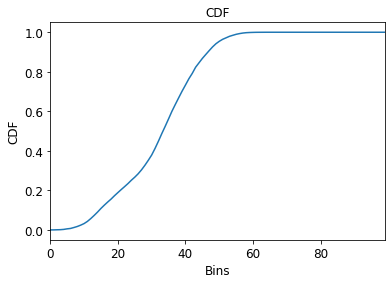

In [5]:
import matplotlib.pyplot as plt
pm = MCdata[100:101]
# pm.plot(kind='bar',legend=False)
ax = pm.transpose().plot(kind='line', title ="CDF", figsize=(6, 4), legend=False, fontsize=12) 
ax.set_xlabel("Bins", fontsize=12)
ax.set_ylabel("CDF", fontsize=12)
plt.show()
    # plt.savefig('filename.png', dpi=600)


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(MCdata, MClabel, test_size=0.33, random_state=42)



In [17]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Initialize the constructor
model = Sequential()

# # Add an input layer 
# model.add(Dense(100, activation='relu', input_shape=(100,)))

# # Add one hidden layer 
# model.add(Dense(20, activation='relu'))

# # Add an output layer 
# model.add(Dense(3, activation='sigmoid'))


#     # Strategy 1:    add weight regulation to avoid overfitting 
        # # Add an input layer 
        #    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(100,)))

        #  # Add one hidden layer 
        #    model.add(Dense(20, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
        #  # l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network.

    # Strategy 2:    Dropout 
model.add(Dense(100, activation='relu', input_shape=(100,)))
layers.Dropout(0.5),
model.add(Dense(20, activation='relu'))
layers.Dropout(0.5),
model.add(Dense(3, activation='sigmoid'))


# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 63        
Total params: 12,183
Trainable params: 12,183
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.01115857,  0.0004867 ,  0.05815296, ..., -0.1315645 ,
         -0.11565755,  0.17149505],
        [ 0.05135955, -0.05100569, -0.15555058, ..., -0.07121442,
          0.1299847 ,  0.14169842],
        [-0.16508919,  0.08114126,  0.03548972, ..., -0.12007271,
          0.16722989,  0.01457612],
        ...,
        [ 0.08841491, -0.07457594,  0.17055467, ..., -0.16677172,
          0.02928701,  0.12025744],
        [ 0.16205692,  0.13980016, -0.08496939, ..., -0.11542869,
         -0.13608266, -0.14960675],
        [ 0.12127537,  0.11132091,  0.06538737, ..., -0.01623984,
         -0.05786683, -0.10997907]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
X_train=X_train.transpose()
X_test=X_test.transpose()
y_train=y_train.transpose()
y_test=y_test.transpose()


from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train,epochs=5,batch_size=1,verbose=1,validation_split=0.2)
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])

Train on 3216 samples, validate on 804 samples
Epoch 1/5
3216/3216 [==============================] - 8s 2ms/step - loss: 0.2188 - acc: 0.8959 - val_loss: 0.0939 - val_acc: 0.9988
Epoch 2/5
3216/3216 [==============================] - 8s 2ms/step - loss: 0.0616 - acc: 0.9796 - val_loss: 0.0324 - val_acc: 0.9851
Epoch 3/5
3216/3216 [==============================] - 8s 3ms/step - loss: 0.0316 - acc: 0.9887 - val_loss: 0.0206 - val_acc: 0.9876
Epoch 4/5
3216/3216 [==============================] - 8s 3ms/step - loss: 0.0257 - acc: 0.9918 - val_loss: 0.0184 - val_acc: 1.0000
Epoch 5/5
1980/1980 [==============================] - 0s 33us/step


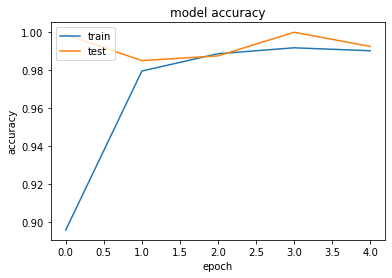

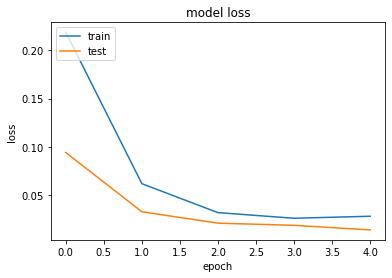

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()